In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from selenium import webdriver
from bs4 import BeautifulSoup
from time import sleep
%matplotlib inline

In [11]:
sales = pd.read_csv('01 Sales Data.csv', parse_dates=[0])
sales.loc[:, 'Amount Raised'] = sales.loc[:, 'Amount Raised'].apply(lambda x: float(x.replace(',', '')))

In [12]:
sales.sort('Followers', ascending=False).head()

,Date Campaign Ended,Campaign Name,Amount Raised,Charity,Insta Username,Followers,Instagram URL
10,2015-05-16,Adorable Animals Socks,397.75,Adorable Animals Instagram,adorable_animals,1818213,https://instagram.com/adorable_animals/
24,2015-06-17,3BULLDOGGES MASHUP,957.00,3bulldoggesinstagram,3bulldogges,189834,https://instagram.com/3bulldogges/
6,2015-04-30,3BullDogges Socks,566.40,3Bulldogges Instagram,3bulldogges,189833,https://instagram.com/3bulldogges/
12,2015-05-17,Bacon the Piglet,387.00,Bacon the Piglet Instagram,bacon_the_piglet,162270,https://instagram.com/bacon_the_piglet/
30,NaT,Cash Cats,8254.15,NaN,cashcats,113714,https://instagram.com/cashcats


In [13]:
sales.sort('Amount Raised', ascending=False).head()

,Date Campaign Ended,Campaign Name,Amount Raised,Charity,Insta Username,Followers,Instagram URL
30,NaT,Cash Cats,8254.15,NaN,cashcats,113714,https://instagram.com/cashcats
2,2015-04-09,Pirate the Frenchy Socks,2676.00,Pirate the Frenchie Instagram,piratethefrenchie,11109,https://instagram.com/piratethefrenchie/
7,2015-05-06,Abbey Socks,2201.25,abbeybellacavalier Instagram,abbeybellacavalier,10744,https://instagram.com/abbeybellacavalier/
14,2015-05-26,Speedy Socks,1972.20,Speedy boy Instagram,speedyboyboy,42127,https://instagram.com/speedyboyboy/
22,2015-06-11,Monte the Maltese,1454.00,https://instagram.com/MontetheMaltese/,MontetheMaltese,66909,https://instagram.com/MontetheMaltese/


In [40]:
def append_correct_syntax(url):
    if 'http' not in url:
        return 'https://' + url
    else:
        return url
    
sales['Instagram URL'] = sales['Instagram URL'].apply(lambda x: append_correct_syntax(x))

In [52]:
driver = webdriver.Chrome()

def get_instagram_following(url):
    driver.get(url)
    sleep(1)
    content = driver.page_source
    soup = BeautifulSoup(content, 'html.parser')
    try:
        following = soup.find('span', {'class': '-cx-PRIVATE-FollowsStatistic__count'}).text
    except:
        following = 0
        pass
    
    return following

def get_instagram_posts(url):
    driver.get(url)
    sleep(1)
    content = driver.page_source
    soup = BeautifulSoup(content, 'html.parser')
    try:
        posts = soup.find('span', {'class': '-cx-PRIVATE-PostsStatistic__count'}).text
    except:
        posts = 0
        pass
    
    return posts     

In [53]:
sales.loc[:, 'Following'] = sales['Instagram URL'].apply(lambda x: get_instagram_following(x))
sales.loc[:, 'Posts'] = sales['Instagram URL'].apply(lambda x: get_instagram_posts(x))

In [56]:
user_cond = sales['Insta Username'] == 'theoneandonlysheeba'
sales.loc[user_cond, ['Following', 'Posts'] ] = ['79', '286']

In [60]:
sales.loc[:, ['Following', 'Posts'] ] = sales.loc[:, ['Following', 'Posts'] ].applymap(lambda x: int(x.replace(',', '')))

In [62]:
sales.head()

,Date Campaign Ended,Campaign Name,Amount Raised,Charity,Insta Username,Followers,Instagram URL,Following,Posts
0,2015-02-13,Mr Bagel Ankle Socks,432.00,Mr Bagel Instagram,chinnybuddy,88134,https://instagram.com/chinnybuddy/,69,994
1,2015-03-20,Otter the Pit Bull Socks,543.50,Otter the Pit Bull Instagram,otterthepitbull,10941,https://instagram.com/otterthepitbull/,1681,670
2,2015-04-09,Pirate the Frenchy Socks,2676.00,Pirate the Frenchie Instagram,piratethefrenchie,11109,https://instagram.com/piratethefrenchie/,395,664
3,2015-04-14,Chicko Pug Socks,323.50,Chicko Pug Instagram,chickopug,20678,https://instagram.com/chickopug/,776,475
4,2015-04-30,Bing Prairie Dog Socks,945.25,Bing Prairie Dog Instagram,prairiedogpack,43923,https://instagram.com/prairiedogpack/,639,521


In [84]:
X = sales[ ['Followers', 'Following', 'Posts'] ]
y = sales['Amount Raised']
X = sm.add_constant(X)

In [85]:
model = OLS(y, X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Amount Raised   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.075
Method:                 Least Squares   F-statistic:                    0.2981
Date:                Fri, 17 Jul 2015   Prob (F-statistic):              0.826
Time:                        20:39:53   Log-Likelihood:                -269.26
No. Observations:                  31   AIC:                             546.5
Df Residuals:                      27   BIC:                             552.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1209.7575    374.573      3.230      0.003       441.197  1978.318
Followers     -0.0003      0.001     -0.305      0.763        -0.002     0.002
Following     -0.1891      0.364     -0.519      0.608        -0.937     0.559
Posts         -0.0569      0.218     -0.261      0.796        -0.504     0.390
==============================================================================
Omnibus:                       58.177   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              433.212
Skew:                           3.933   Prob(JB):                     8.50e-95
Kurtosis:                      19.538   Cond. No.                     4.54e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

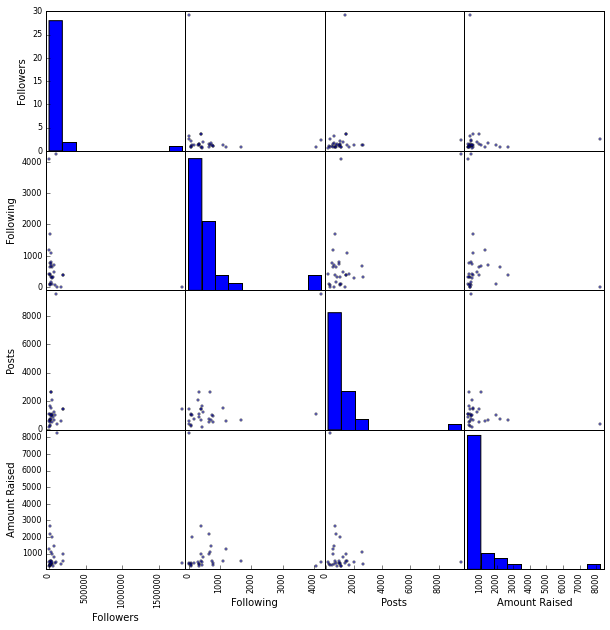

In [90]:
f = plt.figure(figsize=(10, 10))
ax = f.gca()
pd.scatter_matrix(sales[ ['Followers', 'Following', 'Posts', 'Amount Raised'] ], ax=ax)
plt.show()